あるレベル帯の曲の難易度は全て同じだと仮定する。新曲が追加されたときに、自分がその曲をプレイするとどれぐらいの得点が取れそうか知りたい。というのも、音楽ゲームは100円で3曲プレイできるが、得点によっては次の曲に進めない制約があるからである。100円でより多くの曲をプレイするためには、リスクを取りたくない。得点を確率分布に落とし込むことで、このリスクを定量評価できる。

### 仮定
- 同じレベル帯の曲は同じ難易度である。(同じレベルなら曲$_i$のスコアの分布$X_i$は全て同じ分布)
- プレイヤーのスキルは上昇しないものとする。

以下の同じレベル帯で考えることにする。

- プレイごとに得られるスコアは独立同分布である。

#### 知りたい
曲を一回プレイしたときに獲得するスコアXの分布$f^{(X)}(x)$

#### 知っている
曲$_i$を$n_i$回プレイしたときの最大のスコア$m_i$

### ノーテーション
ここで議論する曲の背景に存在する難易度は同じと仮定する。

曲が1〜Nまであるとする。

$n_i$...曲$_i$をプレイした回数

曲を一回プレイしてスコアを得ることを1回の試行とする。

$X_{(i,j)}$...曲$_i$をプレイした中でj回目に出たスコア。

過去の全ての試行を確率変数として表すと以下のようになる。

| 曲  | 過去の全ての試行 |
| :-------------: | :-------------: |
| 1  |  $X_{(1,1)}$,$X_{(1,2)}$,...,$X_{(1,n_{1})}$ |
| 2  | $X_{(2,1)}$,$X_{(2,2)}$,...,$X_{(2,n_{2})}$  |
| ...  | ...  |
| N  | $X_{(N,1)}$,$X_{(N,2)}$,...,$X_{(N,n_{N})}$  |

これらは全て独立同分布に従うと仮定する。またその分布に従う確率変数を$X$と代表して書くことにする。
 
$X$...ある曲を一回プレイしたときに得られるスコアの確率変数。

$f^{(X)}(x)$...推定したい$X$の従う確率分布。

今手元にあるデータは

| 曲  | ベストスコア | プレイ回数 |
| :-------------: | :-------------: | :-----------: |
| 1  |  max($X_{(1,1)}$,$X_{(1,2)}$,...,$X_{(1,n_{1})}$) | $n_1$ |
| 2  | max($X_{(2,1)}$,$X_{(2,2)}$,...,$X_{(2,n_{2})}$)  | $n_2$ |
| ...  | ...  | ... |
| N  | max($X_{(N,1)}$,$X_{(N,2)}$,...,$X_{(N,n_{N})}$)  | $n_N$ |


ベストスコアは確率変数の最大値なのでこれも確率変数である。
$$M_{n_i}=max(X_{(i,1)},X_{(i,2)},...,X_{(i,n_{i})})$$
と定義すると、表は以下のようにスッキリとした見た目になる。

| 曲  | ベストスコア | プレイ回数 |
| :-------------: | :-------------: | :-----------: |
| 1  |$M_{n_i}$| $n_1$ |
| 2  |$M_{n_2}$| $n_2$ |
| ...  | ...  | ... |
| N  |$M_{n_N}$| $n_N$ |


$M_n$...n回試行したときの最大値の確率変数。

$f^{(M_n)}(m)$...$M_n$の従う確率密度関数。

もう一度、目的を確認しておこう。ベストスコアとプレイ回数のデータから、曲を一回プレイしたときに得られる得点$X$の確率分布を求めたいというのが目的である。

### 式
$f^{(X)}(x)$を$f^{(M_n)}(m)$から推定したい。ここで$f^{(X)}(x)$はパラメーター$\boldsymbol\theta$によって表現できるものとする。
そのため$f^{(X)}(x ; \boldsymbol\theta)$と書くことにする。$f^{(X)}(x ; \boldsymbol\theta)$を求めるとはこのパラメーター$\boldsymbol\theta$を求めることである。
$\boldsymbol\theta$を求めるために以下の手続きを取る。


1. $f^{(X)}(x; \boldsymbol\theta)$を使って,最大値の分布$f^{(M_n)}(m ; \boldsymbol\theta)$を構築する。(ここで示した$\boldsymbol\theta$は$f^{(X)}(x ; \boldsymbol\theta)$のパラメーターに共通)
2. $f^{(M_n)}(m ; \boldsymbol\theta)$の負の対数尤度関数を構築する。
3. 2を損失関数とみなし、最小となるパラメーター$\boldsymbol\theta$を探す。ここでは$X$に分布を仮定して具体的な計算式にまで落とし込む。


これらについて一つ一つ式変形をしていこう。



#### 1について
確率密度関数$f(\cdot)$に対して累積密度関数を$F(\cdot)$と書くことにする。$P(\cdot)$を$\cdot$に記載された条件を満たす確率と定義する。このとき、最大値の分布を考えてみる。
最大値の分布は以下の式から議論をスタートしよう。

$$P(M_n < m)  = \left(P(X < m)\right)^n $$

これは、｢最大値の確率変数$M$が$m$より小さい確率は、全ての$X$が$m$より小さい確率と一致する｣という内容を記述する式である。これを累積分布関数に書き換えれば、

$$ F^{(M_n)}(m) = \left(F^{(X)}(m)\right)^n $$

となる。

したがって、$f^{(M_n)}(m)$は以下のように表せる。

$$ f^{(M_n)}(m) = \frac{d}{dm}F^{(M_n)}(m) $$

$$ f^{(M_n)}(m) = \frac{d}{dm}\left(F^{(X)}(m)\right)^n $$

$$ f^{(M_n)}(m) = n \left(F^{(X)}(m)\right)^{n-1}\frac{d}{dm}\left(F^{(X)}(m)\right) $$

$$ f^{(M_n)}(m) = n \left(F^{(X)}(m)\right)^{n-1}f^{(X)}(m)  $$

式の形を少し整理して、パラメーター$\boldsymbol\theta$を自明に書くと以下になる。

$$ f^{(M_n)}(m ; \boldsymbol\theta) = n f^{(X)}(m;\boldsymbol\theta) \left(F^{(X)}(m;\boldsymbol\theta)\right)^{n-1} $$

#### 2について
N個の曲について、プレイした回数とベストスコアはわかっている。これについて負の対数尤度関数を構築することを考える。

$$\text{負の対数尤度} = -\ln\left(\prod_i^N f^{(M_{n_i})}(m_i ; \boldsymbol\theta)\right)$$

となる。1の結果を代入し形を整えると以下のようになる。

$$\text{負の対数尤度} = -\sum_i^N \ln\left( f^{(M_{n_i})}(m_i ; \boldsymbol\theta)\right)$$

$$\text{負の対数尤度} = -\sum_i^N \ln\left( n_i f^{(X)}(m_i;\boldsymbol\theta) \left(F^{(X)}(m_i;\boldsymbol\theta)\right)^{n_i-1} \right)$$

$$\text{負の対数尤度} = -\sum_i^N \left[ \ln n_i + \ln f^{(X)}(m_i;\boldsymbol\theta) + (n_i-1)\ln \left(F^{(X)}(m_i;\boldsymbol\theta)\right) \right]$$




#### 3について
2で求めた負の対数尤度をもとに、$\boldsymbol\theta$についての損失関数を定義すると、
$$loss(\boldsymbol\theta)=-\sum_i^N \left[ \ln f^{(X)}(m_i;\boldsymbol\theta) + (n_i-1)\ln \left(F^{(X)}(m_i;\boldsymbol\theta)\right) \right]$$
となる。

これは見ての通り、$X$についての分布$f^{(X)}(m_i;\boldsymbol\theta)$を仮定しないと損失が計算できない形式になっている。

そこで、今回は$f^{(X)}(m_i;\boldsymbol\theta)$にベータ分布を仮定した。これは、5年間プレイしてきての経験と、実際にランダムに選曲してスコアを実測した結果から来る仮定である。(実測のヒストグラムは付録に示す)

つまり
$$f^{(X)}(x;\boldsymbol\theta)=\frac{x^{a-1}(1-x)^{b-1}}{B(a,b)}(=Beta(x; a,b))$$
である。ただし、$B(\cdot)$はベータ関数で、
$$B(a,b)=\int_0^1 x^{a-1}(1-x)^{b-1} dx$$
である。

これを先の損失関数に代入すると、
$$loss(a,b)=-\sum_i^N \left[ \ln \frac{m_i^{a-1}(1-m_i)^{b-1}}{B(a,b)} + (n_i-1)\ln \int_0^{m_i} \frac{m_i^{a-1}(1-m_i)^{b-1}}{B(a,b)} dm_i \right]$$


$$loss(a,b)=-\sum_i^N \left[ -\ln B(a,b) + \ln (m_i^{a-1}(1-m_i)^{b-1}) + (n_i-1)\ln \int_0^{m_i} \frac{m_i^{a-1}(1-m_i)^{b-1}}{B(a,b)} dm_i \right]$$

$$loss(a,b)=-\sum_i^N \left[ -\ln B(a,b) + (a-1)\ln m_i + (b-1)\ln(1-m_i) + (n_i-1)\ln \int_0^{m_i} \frac{m_i^{a-1}(1-m_i)^{b-1}}{B(a,b)} dm_i \right]$$

シグマの中の第4項目の積分は正則化された不完全ベータ関数と言われるものである。表記を簡単にするために、
$$I_x(a,b) = \int_0^{x} \frac{x^{a-1}(1-x)^{b-1}}{B(a,b)} dx$$
とおくと、損失関数は結局

$$loss(a,b)=-\sum_i^N \left[ -\ln B(a,b) + (a-1)\ln m_i + (b-1)\ln(1-m_i) + (n_i-1)\ln I_x(a,b) \right]$$

$$loss(a,b)=\sum_i^N \left[ \ln B(a,b) - (a-1)\ln m_i - (b-1)\ln(1-m_i) - (n_i-1)\ln I_x(a,b) \right]$$

となる。

ゴールは、
$$a,b = \arg \min_{a,b} loss(a,b)$$
を求めることである。

ここではa,bをグリッド状に全探索することで、損失関数を最小化するパラメーターを探索する。

In [1]:
import numpy as np
import pandas as pd
from scipy.special import betaln, betainc, beta
from scipy import stats
from scipy.optimize import minimize

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
def loss(a,b,ns:np.array,ms:np.array):
    firstitem=ns+betaln(a,b)
    seconditem=-(a-1)*np.log(ms)
    thirditem=-(b-1)*np.log(1-ms)
    fourthitem=-(ns-1)*np.log(betainc(a,b,ms))
    
    tmp_arr=firstitem+seconditem+thirditem+fourthitem
    
    return tmp_arr.sum()

def load_data(path='./sdvx20190524.csv'):
    df=pd.read_csv('./sdvx20190524.csv')
    df['ハイスコア']=df['ハイスコア']/10000000
    return {17:df[df['楽曲レベル']==17],
            18:df[df['楽曲レベル']==18],
            19:df[df['楽曲レベル']==19],
            20:df[df['楽曲レベル']==20],}

def arg_min(ns:np.array,ms:np.array):
    def objective(ab):
        a,b=ab
        return loss(a,b,ns, ms)
    a,b=minimize(objective,(1,1)).x
    return a,b

def show_beta(a,b):
    plt.plot(np.linspace(0,1,1000),stats.beta.pdf(np.linspace(0,1,1000),a,b))
    plt.xlabel('x')
    plt.ylabel('probability density')
    plt.show()

In [3]:
dfs=load_data()

### レベル17について

In [4]:
df_17=dfs[17]
df_17.head()

,楽曲名,難易度,楽曲レベル,クリアランク,スコアグレード,ハイスコア,プレー回数,クリア回数,ULTIMATE CHAIN,PERFECT
0,Into The Madness,MAXIMUM,17,EXCESSIVE COMPLETE,AAA+,0.987636,1,1,0,0
1,Circulator,MAXIMUM,17,EXCESSIVE COMPLETE,AAA+,0.981752,1,1,0,0
2,悪戯センセーション,MAXIMUM,17,EXCESSIVE COMPLETE,AAA+,0.987912,1,1,0,0
3,ΩBIRD,MAXIMUM,17,EXCESSIVE COMPLETE,S,0.992571,1,1,0,0
7,DESIRE,MAXIMUM,17,EXCESSIVE COMPLETE,AAA+,0.984278,1,1,0,0


In [5]:
n_play=df_17['プレー回数'].values
m_score=df_17['ハイスコア'].values

In [6]:
a,b=arg_min(n_play,m_score)

In [7]:
a,b

(73.32147800540963, 3.172453850691303)

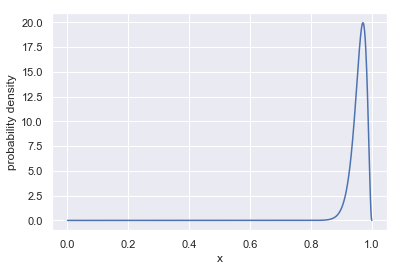

In [8]:
show_beta(a,b)

In [9]:
def show_lossfunction(arange,brange):
    a_min,a_max=arange
    b_min,b_max=brange
    result=[]
    a_axis=np.linspace(a_min,a_max,200)
    b_axis=np.linspace(b_min,b_max,100)
    for a in a_axis:
        tmp=[]
        for b in b_axis:
            tmp.append(loss(a,b,n_play,m_score))
        result.append(tmp)
    result=pd.DataFrame(result,index=a_axis,columns=b_axis)
    plt.figure(figsize=(10,10))
    sns.heatmap(result,vmax=3000)
    plt.show()

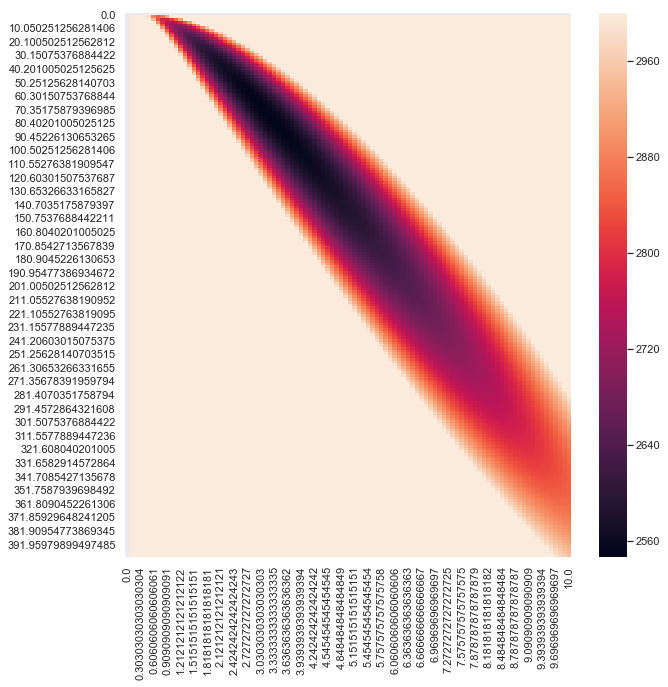

In [10]:
show_lossfunction((0,400),(0,10))

### レベル18について

In [11]:
df=dfs[18]
n_play=df['プレー回数'].values
m_score=df['ハイスコア'].values
df.head()

,楽曲名,難易度,楽曲レベル,クリアランク,スコアグレード,ハイスコア,プレー回数,クリア回数,ULTIMATE CHAIN,PERFECT
6,諏訪大信仰,MAXIMUM,18,EXCESSIVE COMPLETE,S,0.993144,2,2,0,0
10,Atropa bella-donna,MAXIMUM,18,EXCESSIVE COMPLETE,AAA,0.977108,2,2,0,0
13,Xicholauncher,MAXIMUM,18,EXCESSIVE COMPLETE,AAA+,0.981066,2,2,0,0
18,ツマミ戦隊 タテレンジャー,MAXIMUM,18,COMPLETE,AA,0.945630,6,4,0,0
21,Barbatos,MAXIMUM,18,EXCESSIVE COMPLETE,AA+,0.969913,4,4,0,0


In [12]:
a,b=arg_min(n_play,m_score)

In [13]:
a,b

(78.64110319407737, 5.005043841813423)

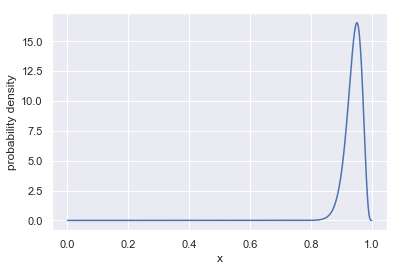

In [14]:
show_beta(a,b)

### レベル19について

In [15]:
df=dfs[19]
n_play=df['プレー回数'].values
m_score=df['ハイスコア'].values
df.head()

,楽曲名,難易度,楽曲レベル,クリアランク,スコアグレード,ハイスコア,プレー回数,クリア回数,ULTIMATE CHAIN,PERFECT
15,THE凸GENERATOR,MAXIMUM,19,COMPLETE,A+,0.922669,4,4,0,0
44,TENKAICHI ULTIMATE BOSSRUSH MEDLEY,MAXIMUM,19,COMPLETE,AA+,0.959859,4,3,0,0
98,Cross Fire,MAXIMUM,19,EXCESSIVE COMPLETE,AAA,0.970353,9,8,0,0
100,GODHEART,MAXIMUM,19,EXCESSIVE COMPLETE,AAA,0.971423,3,2,0,0
150,逆月,MAXIMUM,19,EXCESSIVE COMPLETE,AAA,0.975467,5,4,0,0


In [16]:
a,b=arg_min(n_play,m_score)

In [17]:
a,b

(25.607737644358778, 3.771704957549805)

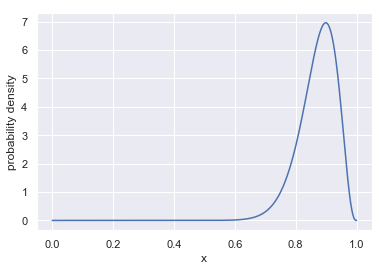

In [18]:
show_beta(a,b)

### レベル20について

In [19]:
df=dfs[20].drop(96)
n_play=df['プレー回数'].values
m_score=df['ハイスコア'].values
df

,楽曲名,難易度,楽曲レベル,クリアランク,スコアグレード,ハイスコア,プレー回数,クリア回数,ULTIMATE CHAIN,PERFECT
109,*Feels Seasickness...*,MAXIMUM,20,COMPLETE,AA,0.941634,14,2,0,0
223,Xronièr,MAXIMUM,20,COMPLETE,AA,0.945362,16,1,0,0
358,I,MAXIMUM,20,COMPLETE,AA+,0.957317,22,1,0,0
537,FIN4LE ～終止線の彼方へ～,MAXIMUM,20,PLAYED,A+,0.915466,5,0,0,0
540,WHITEOUT,MAXIMUM,20,PLAYED,AA,0.930971,8,0,0,0
635,iLLness LiLin,MAXIMUM,20,PLAYED,A+,0.916706,25,0,0,0
669,HE4VEN ～天国へようこそ～,MAXIMUM,20,COMPLETE,AA,0.941262,32,2,0,0
910,Lachryma《Re:Queen’M》,GRAVITY,20,PLAYED,AA,0.940950,15,0,0,0


In [20]:
a,b=arg_min(n_play,m_score)

In [21]:
a,b

(72.02767935300214, 9.631343766205594)

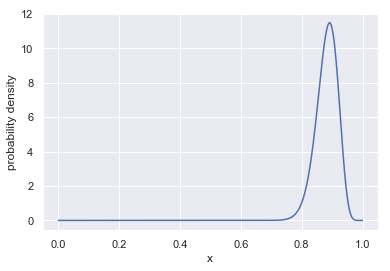

In [22]:
show_beta(a,b)

全体的な傾向としては、自分の実力よりも低めに推定された。こうなってしまった大きな理由としては2つ考えられる。
1. データには自分が現在の自分よりも下手だったデータが全て含まれている。そのため、自分の現在の実力よりも低めに推定された。
2. 自分は一回良いスコア(例えば0．99)が得られたらあまりプレイしなくなるため、スコアが出にくい曲のプレイ回数が多くなる傾向がある。そのため、自分の実力よりも低めに推定された。

全体的に難易度が高くなるほど、スコアの期待値が減少する傾向が得られた。
レベル20に関しては、レベル19よりも高得点が取れそうな分布の形をしていたが、この原因として考えられるのは上記で議論した1の影響が特に効いたためである。
というのもレベル20においては、ある1曲(Lachryma《Re:Queen’M》)を除いて、他の8曲は、2017/02/17以降に追加されたため、自分の現在の実力と比較的近い実力でプレイしている。
しかしレベル19の半分ほどの曲はそれより以前から存在していて、自分がゲームを始めたての頃にもプレイした。そのためプレイ回数が増え、レベル19のほうがスコアを取りにくいという結果が出たと考えられる。




(0, 1)

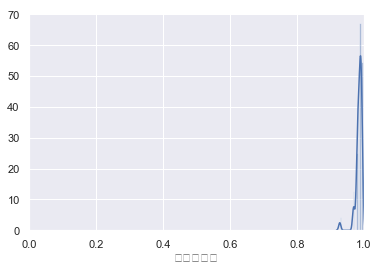